### import module 

In [84]:
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [28]:
folder='data\SalesAnalysis\Sales_Data'
files=[fill for fill in os.listdir(folder)]
all_data=pd.DataFrame()
for file in files:
    df =pd.read_csv(os.path.join(folder,file))
    all_data=pd.concat([all_data,df])

all_data


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [31]:
#drop null rows
all_data.dropna(inplace=True)
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [25]:
#save all_data to csv file
all_data.to_csv('all_data.csv',index=False)

In [57]:
# read all data of months
df = pd.read_csv('all_data.csv')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### Data Cleaning and Wrangling

In [58]:
# some information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186305 entries, 0 to 186304
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.5+ MB


In [59]:
# covert column name
df.rename(columns= lambda x : x.strip().lower().replace(' ','_'),inplace=True)
df.columns

Index(['order_id', 'product', 'quantity_ordered', 'price_each', 'order_date',
       'purchase_address'],
      dtype='object')

In [64]:
df['quantity_ordered'].unique()

array(['2', '1', '3', '5', 'Quantity Ordered', '4', '7', '6', '8', '9'],
      dtype=object)

In [67]:
# drop null value from data
null=df[df['quantity_ordered'] == 'Quantity Ordered']
df.drop(null.index,inplace=True)

In [68]:
#convert dtype of quantity_ordered and price_each
df['quantity_ordered'] = pd.to_numeric(df['quantity_ordered'])
df['price_each'] = pd.to_numeric(df['price_each'])

In [73]:
#add sales column
df['sales'] = df['quantity_ordered'] * df['price_each']
df.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [78]:
#convert dtype od column order_date
df['order_date']=pd.to_datetime(df['order_date'])

In [154]:
# add month column
df['month'] = df['order_date'].dt.month_name()
#add hour column
df['hour'] = df['order_date'].dt.hour
#add minute column
df['minute'] = df['order_date'].dt.minute
df

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,sales,city,hour,minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April,23.90,Dallas (TX),8,46
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April,99.99,Boston (MA),22,30
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,600.00,Los Angeles (CA),14,38
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,11.99,Los Angeles (CA),14,38
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April,11.99,Los Angeles (CA),9,27
...,...,...,...,...,...,...,...,...,...,...,...
186300,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",September,8.97,Los Angeles (CA),20,56
186301,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",September,700.00,San Francisco (CA),16,0
186302,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",September,700.00,San Francisco (CA),7,39
186303,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",September,379.99,San Francisco (CA),17,30


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186304
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   order_id          185950 non-null  object        
 1   product           185950 non-null  object        
 2   quantity_ordered  185950 non-null  int64         
 3   price_each        185950 non-null  float64       
 4   order_date        185950 non-null  datetime64[ns]
 5   purchase_address  185950 non-null  object        
 6   month             185950 non-null  object        
 7   sales             185950 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 12.8+ MB


In [120]:
df.shape

(185950, 8)

In [138]:
def get_city(x):
    return x.split(',')[1]

def get_stat(x):
    return x.split(',')[2].split(' ')[1]

df['city'] = df['purchase_address'].apply(lambda x:f"{get_city(x)} ({get_stat(x)})")
df.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,sales,city
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April,23.90,Dallas (TX)
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April,99.99,Boston (MA)
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,600.00,Los Angeles (CA)
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,11.99,Los Angeles (CA)
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April,11.99,Los Angeles (CA)


In [185]:
#remove duplicated rows
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [186]:
df.shape

(185686, 11)

### Q1 What was the best month for sales? and How much was earned that month?

In [187]:
result=df.groupby('month').sum()

C:\Users\Office\AppData\Local\Temp\ipykernel_20004\597374423.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result=df.groupby('month').sum()


Text(0, 0.5, 'sales in usdt ($)')

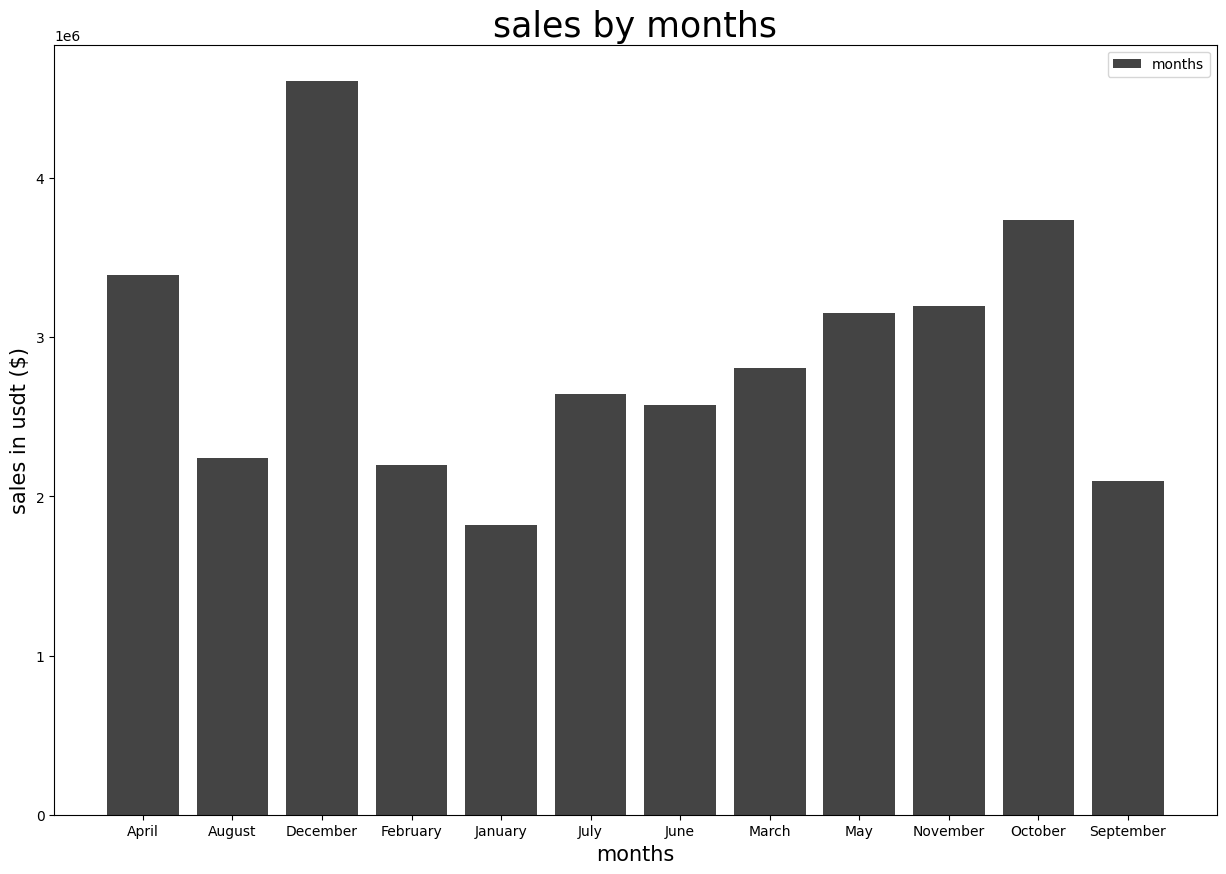

In [188]:
months=[month for month , df in df.groupby('month')]
plt.figure(figsize=(15,10))
plt.bar(months,result['sales'],label='months',color='#444444')
plt.legend()
plt.title('sales by months',fontsize=25)
plt.xlabel('months',fontsize=15)
plt.ylabel('sales in usdt ($)',fontsize=15)

### what city had the highest number of sales?

In [189]:
result_city=df.groupby('city').sum()['sales']

C:\Users\Office\AppData\Local\Temp\ipykernel_20004\1923560138.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result_city=df.groupby('city').sum()['sales']


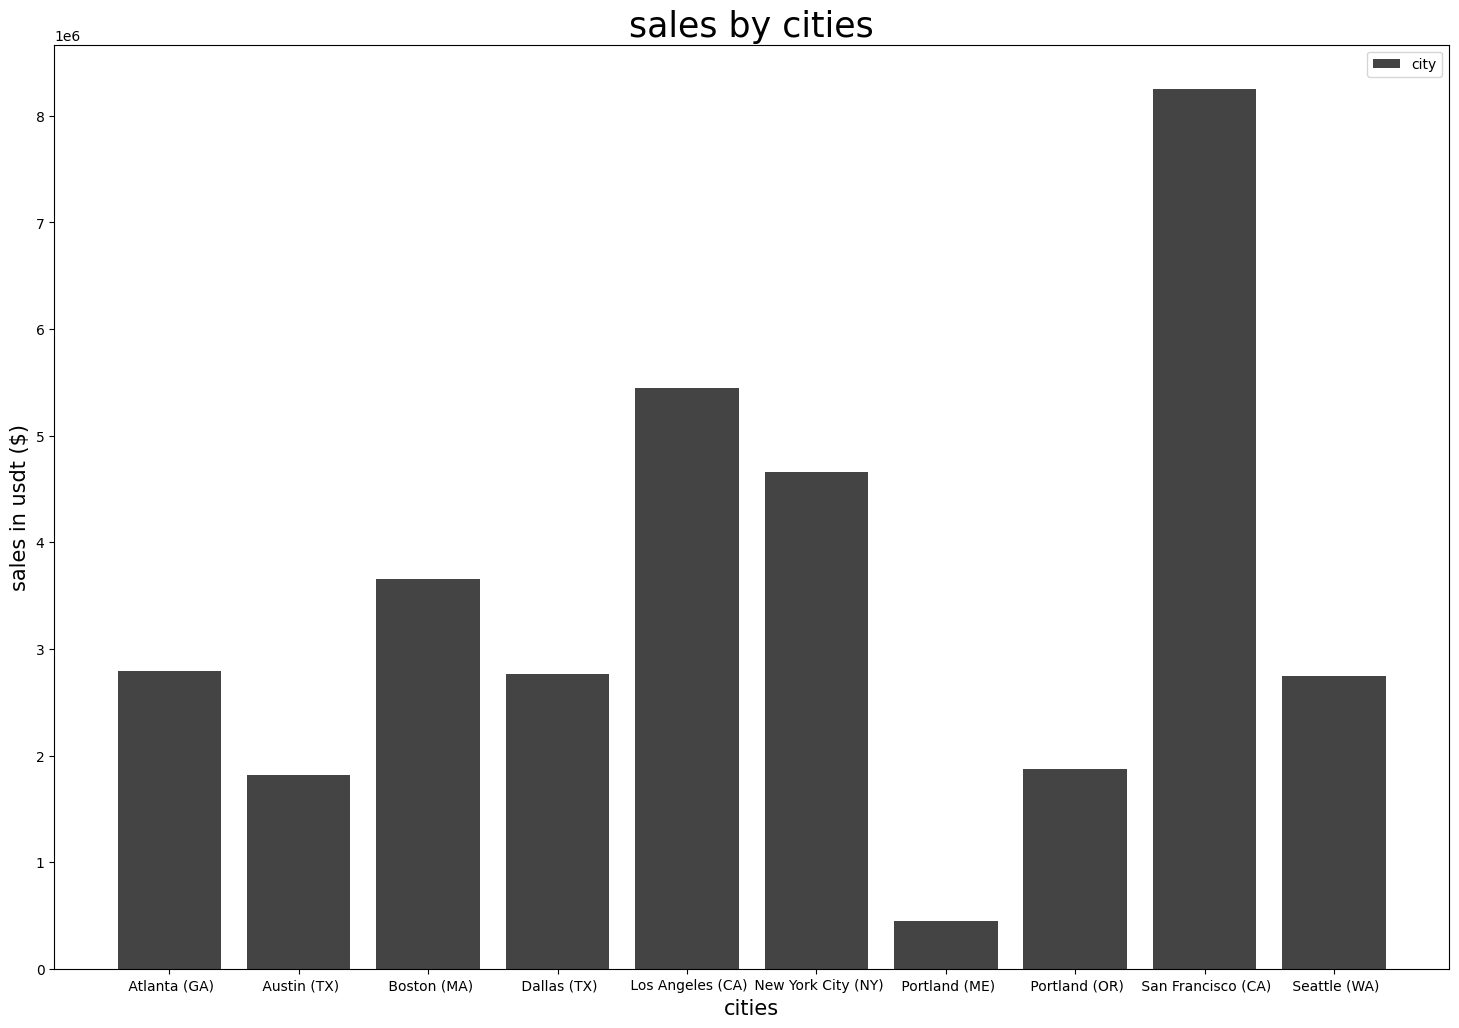

In [190]:
plt.figure(figsize=(18,12))
cities=[city for city , df in df.groupby('city')]
plt.bar(cities,result_city,color='#444444',label='city')
plt.legend()
plt.title('sales by cities',fontsize=25)
plt.xlabel('cities',fontsize=15)
plt.ylabel('sales in usdt ($)',fontsize=15);

### what time should we display advertisements to maximize likelihood of customer's buying product?

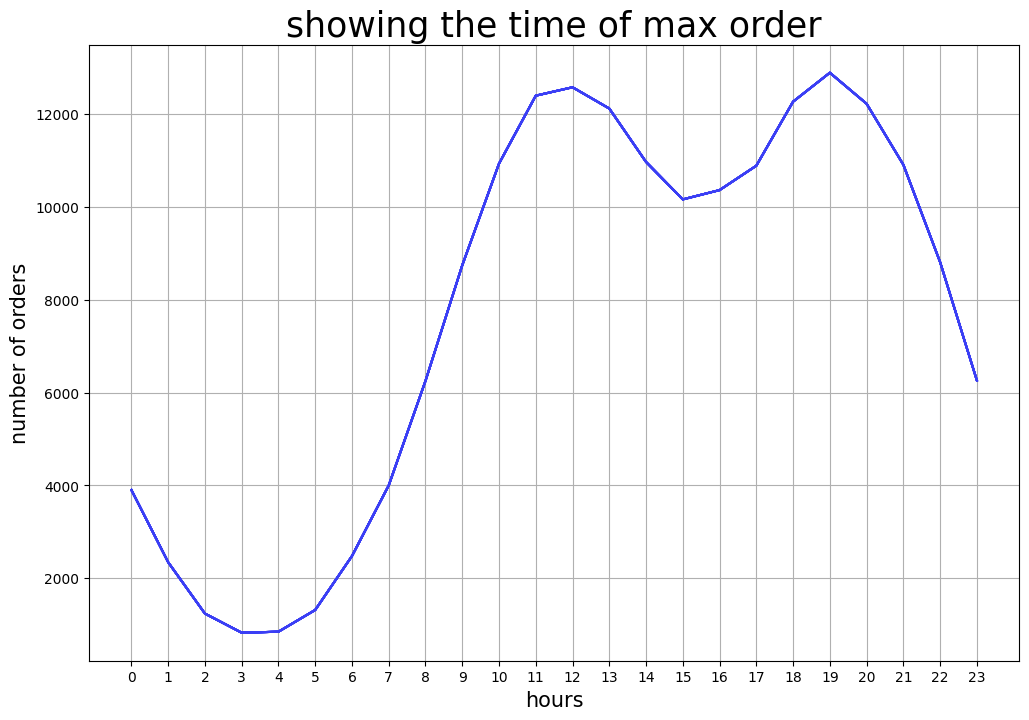

In [191]:
hours=[hour for hour,df in df.groupby('hour')]
plt.plot(hours,df.groupby(['hour']).count(),color='#3A3EF5')
plt.grid()
plt.xticks(hours)
plt.xlabel('hours',fontsize=15)
plt.ylabel('number of orders',fontsize=15)
plt.title('showing the time of max order',fontsize=25)
plt.show()

### what products are most often sold together?

In [222]:
df.drop_duplicates(['order_id','product'],inplace=True)
result_product=df.groupby('product').sum()['quantity_ordered']
result_product

C:\Users\Office\AppData\Local\Temp\ipykernel_20004\3797330295.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result_product=df.groupby('product').sum()['quantity_ordered']


product
20in Monitor                   4126
27in 4K Gaming Monitor         6239
27in FHD Monitor               7541
34in Ultrawide Monitor         6192
AA Batteries (4-pack)         27588
AAA Batteries (4-pack)        30949
Apple Airpods Headphones      15637
Bose SoundSport Headphones    13430
Flatscreen TV                  4813
Google Phone                   5529
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23158
Macbook Pro Laptop             4725
ThinkPad Laptop                4128
USB-C Charging Cable          23926
Vareebadd Phone                2068
Wired Headphones              20522
iPhone                         6847
Name: quantity_ordered, dtype: int64

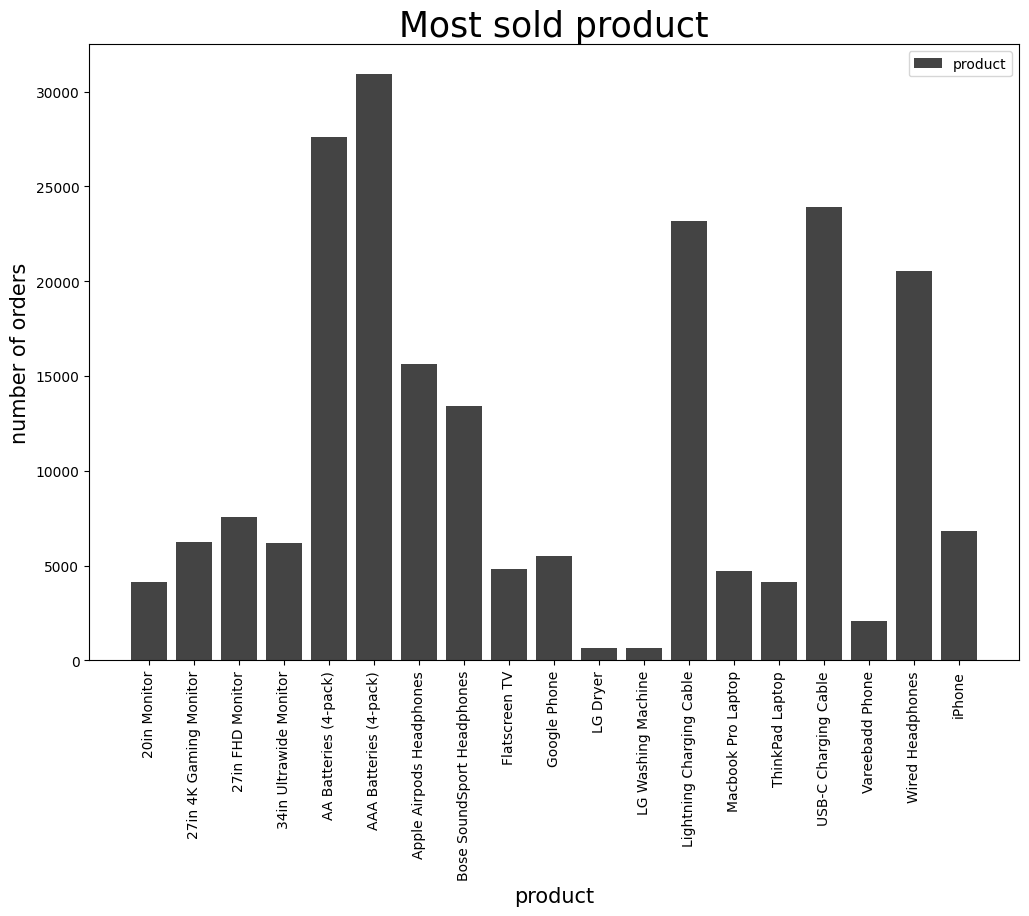

In [234]:
products=[product for product ,df in df.groupby('product')]
plt.bar(products,result_product,color='#444444',label='product')
plt.legend()
plt.xticks(products,rotation='vertical',size=10)
plt.xlabel('product',fontsize=15)
plt.ylabel('number of orders',fontsize=15)
plt.title('Most sold product',fontsize=25);


In [241]:
prices = df.groupby('product').mean()['price_each']

C:\Users\Office\AppData\Local\Temp\ipykernel_20004\4086504197.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prices = df.groupby('product').mean()['price_each']


C:\Users\Office\AppData\Local\Temp\ipykernel_20004\3800032028.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size=10)
C:\Users\Office\AppData\Local\Temp\ipykernel_20004\3800032028.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


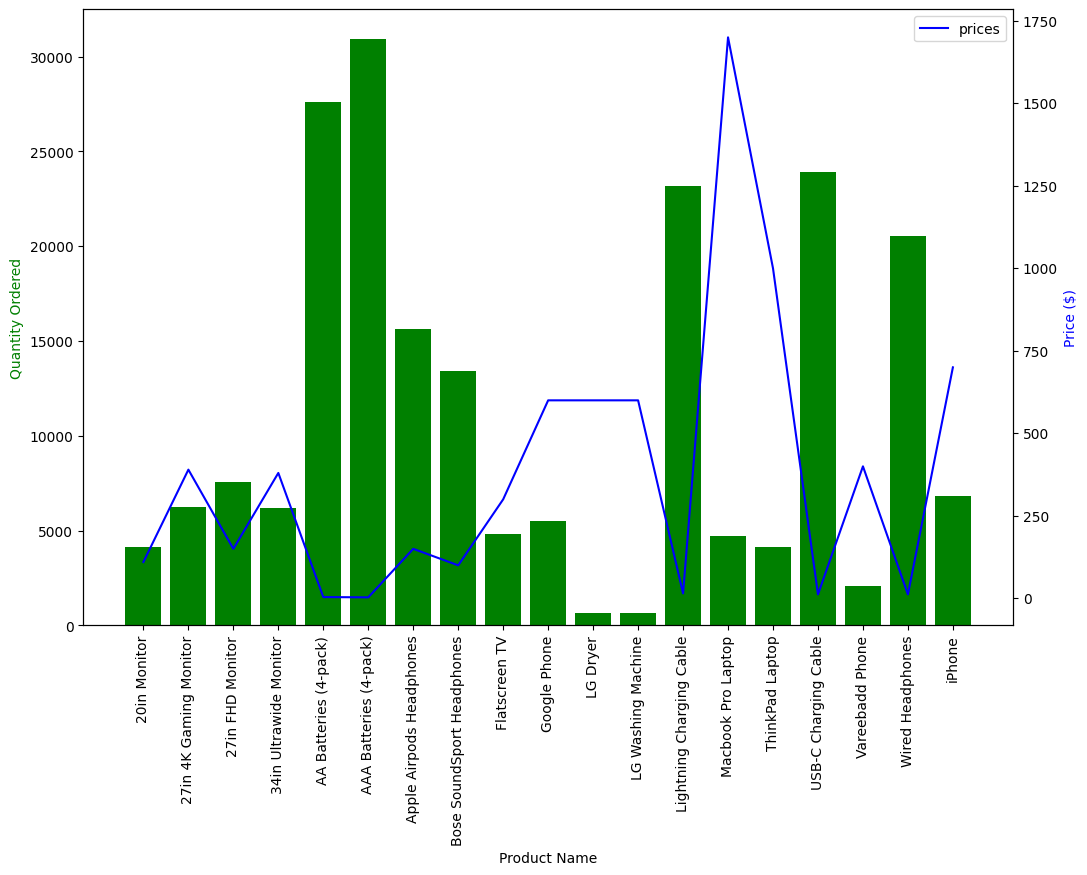

In [250]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, result_product, color='g',label='order')
ax2.plot(products, prices, color='b',label='prices')
plt.legend()

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=10)

fig.show()